In [2]:
import numpy as np
from astropy.io import fits
from astropy.table import Table as Table
import matplotlib.pyplot as plt
#from linetools.spectra import utils as ltsu
#from linetools.spectra.xspectrum1d import XSpectrum1D
import astropy.units as u
from astropy import constants as const
from numpy import random as ran
%matplotlib inline

In [3]:
stack1 = fits.open("/Users/jsmonzon/lbg_da/fits/composites/lowz/stack.fits")

model1 = fits.open("/Users/jsmonzon/lbg_da/fits/composites/lowz/model.fits")

stack2 = fits.open("/Users/jsmonzon/lbg_da/fits/composites/hiz/stack.fits")

model2 = fits.open("/Users/jsmonzon/lbg_da/fits/composites/hiz/model.fits")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jsmonzon/lbg_da/fits/composites/lowz/model.fits'

In [3]:
yaga1 = ran.randint(0,10000, 70)

yaga2 = ran.randint(0,10000, 70)

In [4]:
models_low = []

for i in yaga1:
    
    model = fits.open("/Users/jsmonzon/IGM/fits/bootstrap/lowz/model_"+str(i)+".fits")
    
    data = model[0].data
    
    models_low.append(data)

In [5]:
models_hi = []

for i in yaga2:
    
    model = fits.open("/Users/jsmonzon/IGM/fits/bootstrap/hiz/model_"+str(i)+".fits")
    data = model[0].data
    
    models_hi.append(data)

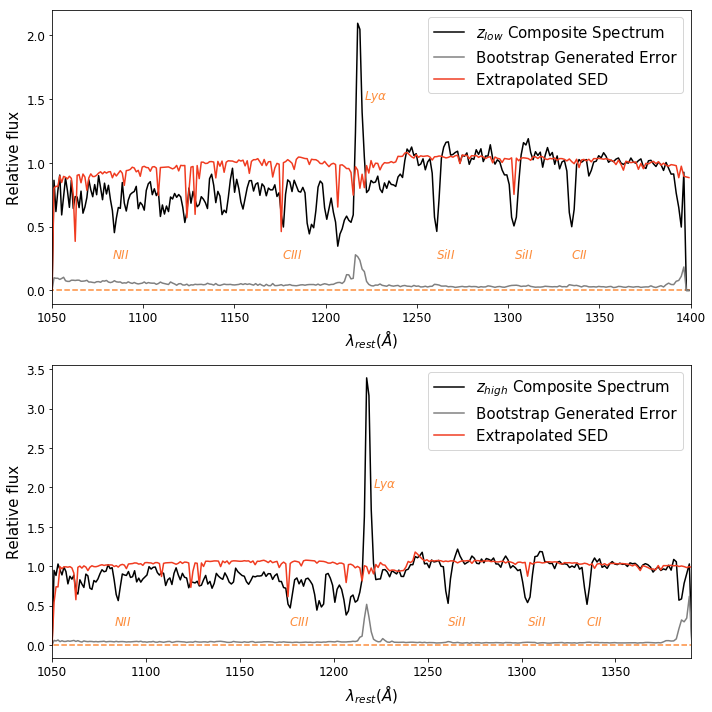

In [7]:
fig, ax = plt.subplots(figsize=(10, 10), tight_layout=True)

plt.subplot(2,1,1)

plt.plot(stack1[1].data["wavelength"],stack1[1].data["flux"],label="$z_{low}$ Composite Spectrum",color="black")
plt.plot(stack1[1].data["wavelength"],stack1[1].data["noise"], label = "Bootstrap Generated Error",color="grey")
plt.plot(stack1[1].data["wavelength"],model1[0].data, label = "Extrapolated SED",color="#f03b20")

#for entry in models_low:
#    plt.plot(stack1[1].data["wavelength"],entry, color= "red", alpha = .01)

#plt.fill_between(lya1, np.min(model1[0].data), model1[0].data,
#                 facecolor='lightblue',step='mid', alpha = .5, label = "Effective Opacity Measurements")

#zero line
plt.hlines(0,1000,1500, color="#fd8d3c",linestyle="--")
#interstellar absorption features
plt.text(1260.42,.25,"$SiII$",fontsize=12,color="#fd8d3c")
plt.text(1303.1685,.25,"$SiII$",fontsize=12,color="#fd8d3c")
plt.text(1334.5323,.25,"$CII$",fontsize=12,color="#fd8d3c")
plt.text(1176,.25,"$CIII$",fontsize=12,color="#fd8d3c")

#stellar absorption features
plt.text(1083,.25,"$NII$",fontsize=12,color="#fd8d3c")

#emission features
plt.text(1221,1.5,"$Lyα$",fontsize=12,color="#fd8d3c")

#axis labels
plt.xlabel("$\lambda_{rest} (\AA)$",fontsize=15)
plt.ylabel("Relative flux",fontsize=15)

#misc
plt.legend(fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1050,1400)

#--------------------------------------------------------------------------
plt.subplot(2,1,2)


plt.plot(stack2[1].data["wavelength"],stack2[1].data["flux"],label="$z_{high}$ Composite Spectrum",color="black")
plt.plot(stack2[1].data["wavelength"],stack2[1].data["noise"], label = "Bootstrap Generated Error",color="grey")
plt.plot(stack2[1].data["wavelength"],model2[0].data, label = "Extrapolated SED",color="#f03b20")

#for entry in models_hi:
#    plt.plot(stack2[1].data["wavelength"],entry, color= "red", alpha = .05)


#plt.fill_between(lya2, np.min(model2[0].data), model2[0].data,
#                 facecolor='lightblue',step='mid', alpha = .5, label = "Effective Opacity Measurements")
#zero
plt.hlines(0,1000,1400, color="#fd8d3c",linestyle="--")
#interstellar absorption features
plt.text(1260.42,.25,"$SiII$",fontsize=12,color="#fd8d3c")
plt.text(1303.1685,.25,"$SiII$",fontsize=12,color="#fd8d3c")
plt.text(1334.5323,.25,"$CII$",fontsize=12,color="#fd8d3c")
plt.text(1176,.25,"$CIII$",fontsize=12,color="#fd8d3c")

#stellar absorption features
plt.text(1083,.25,"$NII$",fontsize=12,color="#fd8d3c")

#emission features
plt.text(1221,2.0,"$Lyα$",fontsize=12,color="#fd8d3c")

#axis
plt.xlabel("$\lambda_{rest} (\AA)$",fontsize=15)
plt.ylabel("Relative flux",fontsize=15)

#misc
plt.legend(fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1050,1390)

plt.savefig("/Users/jsmonzon/IGM/figures/composite_models.pdf")
plt.show()